## Librerías

Importamos librerías a utilizar

In [1]:
include(raw"D:\Git\MCSN\MCSN_OUT\Proyecto\quantum_mcsn.jl")

using .quantum
using LinearAlgebra
using Distributions
using StatsBase
using IJulia

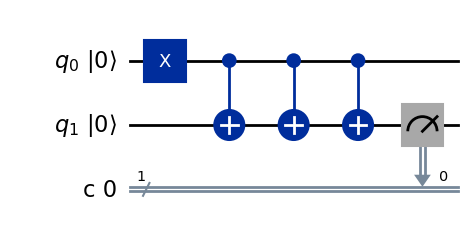

In [4]:

img = read("D:\\qiskit\\EXPERIMENTOS\\circ.png")
IJulia.display("image/png", img)

#Orden de los qubits en los vectores de estado

$\ket{q_1, q_0}$

## Compuertas y funciones a utilizar

$X\ket{0}= \ket{1}$

$X\ket{1}= \ket{0}$

$Z\ket{0}=+1\ket{0}$

$Z\ket{1}=-1\ket{1}$

Compuerta Control-Not, esta operación tiene un bit control y un bit target

T C

   0      0      ------>  0 0

   0      1      ------>  1 1

   1      0      ------>  1 0

   1      1      ------>  0 1  

In [2]:
cnot= [1.0 0 0 0;
        0 0 0 1;
        0 0 1 0;
        0 1 0 0]

4×4 Matrix{Float64}:
 1.0  0.0  0.0  0.0
 0.0  0.0  0.0  1.0
 0.0  0.0  1.0  0.0
 0.0  1.0  0.0  0.0

Partimos de suponer que el error en cada operación aplicada se puede modelar como

$U_N= \Lambda_{error} \circ U$

Donde $\Lambda_{error}$ es un canal cuántico que modela el error, nosotros escogimos un canal tipo Pauli.

$\Lambda_{error} (\rho)= (1-p_x-p_y-p_z)\rho + p_xX\rho X +p_yY\rho Y + p_z Z\rho Z$.

Y para compuertas de dos qubits

$\Lambda_{error}\otimes \Lambda_{error}$.

Además $U=U(\rho)=U\rho U^{\dagger}$

La idea es encontrar una operación inversa, aunque no sea un mapa CPTP

$\Lambda_{error}^{-1}\circ \Lambda_{error}(\rho)=\rho$ &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; (1)

Se propone como canal inverso uno tipo "Pauli"

$\Lambda_{error}^{-1}(\rho)=(1-q_x-q_y-q_z)\rho + q_xX\rho X + q_y Y\rho Y + q_z Z\rho Z$

Sí uno impone la ecuación (1) se llega al siguiente sistema de ecuaciones:

$p_x + q_x(1-2p_x-p_y-p_z) + q_y(p_z-p_x) + q_z(p_y-p_x)=0$

$p_y + q_x(p_z-p_y) + q_y(1-2p_y-p_x-p_z) + q_z(p_x-p_y)=0$

$p_z + q_x(p_y-p_z) + q_y(p_x-p_z) + q_z(1-2p_z-p_x-p_y)=0$


In [3]:
using SymPy

In [4]:
@syms px, py, pz, qx, qy, qz, P, PZ

(px, py, pz, qx, qy, qz, P, PZ)

In [8]:
eq1= Eq(qx*(1-2px-py-pz) + qy*(pz-px) + qz*(py-px), -px)
eq2= Eq(qx*(pz-py) + qy*(1-2py-px-pz) + qz*(px-py), -py)
eq3= Eq(qx*(py-pz) + qy*(px-pz) + qz*(1-2pz-px-py), -pz)

sol= solve([eq1, eq2, eq3], [qx, qy, qz])

sys:1: SymPyDeprecationWarning: 

non-Expr objects in a Matrix is deprecated. Matrix represents
a mathematical matrix. To represent a container of non-numeric
entities, Use a list of lists, TableForm, NumPy array, or some
other data structure instead.

See https://docs.sympy.org/latest/explanation/active-deprecations.html#deprecated-non-expr-in-matrix
for details.

This has been deprecated since SymPy version 1.9. It
will be removed in a future version of SymPy.



Dict{Sym{PyCall.PyObject}, Sym{PyCall.PyObject}} with 3 entries:
  qy => (2*px^2*py + 2*px^2*pz + 2*px*py^2 + 4*px*py*pz - 2*px*py + 2*px*pz^2 -…
  qz => (2*px^2*py + 2*px^2*pz + 2*px*py^2 + 4*px*py*pz - 2*px*py + 2*px*pz^2 -…
  qx => (2*px^2*py + 2*px^2*pz - 2*px^2 + 2*px*py^2 + 4*px*py*pz - 2*px*py + 2*…

In [9]:
Qx=sol[qx]
Qy=sol[qy]
Qz=sol[qz]

                        2          2             2                             >
                    2*px *py + 2*px *pz + 2*px*py  + 4*px*py*pz - 2*px*py + 2* >
------------------------------------------------------------------------------ >
    2          2          2          2                                   2     >
8*px *py + 8*px *pz - 4*px  + 8*px*py  + 16*px*py*pz - 12*px*py + 8*px*pz  - 1 >

>      2                 2             2                 2                     >
> px*pz  - 2*px*pz + 2*py *pz + 2*py*pz  - 2*py*pz - 2*pz  + pz                >
> ---------------------------------------------------------------------------- >
>                      2          2          2                         2       >
> 2*px*pz + 4*px + 8*py *pz - 4*py  + 8*py*pz  - 12*py*pz + 4*py - 4*pz  + 4*p >

>      
>      
> -----
>      
> z - 1

Con el fin de simplificar más tomamos:

px=py=P

In [11]:
q_x=simplify(Qx.subs(px, P).subs(py, P).subs(pz, PZ))

   P   
-------
4*P - 1

In [13]:
q_y=simplify(Qy.subs(px, P).subs(py, P).subs(pz, PZ))

   P   
-------
4*P - 1

In [14]:
q_z=simplify(Qz.subs(px, P).subs(py, P).subs(pz, PZ))

         2                    
      2*P  + 2*P*PZ - PZ      
------------------------------
   2                          
8*P  + 8*P*PZ - 6*P - 2*PZ + 1

Matemática podemos escribir U como

$U= \Lambda_{error}^{-1}\circ U_{N}$

Es importante aclarar que esta no es la operación unitaria ideal, ya que no representa una operación física válida al no ser un mapa positivo.

Sin embargo, para calcular el valor esperado de alguna observable de interés, usando la descomposición de $\Lambda^{-1}$ es posible escribir el valor esperado como

$Tr(OU(\rho))=\sum_{i=0}^{3}q_i Tr(OB_{i}\circ U_N(\rho))$. 

Donde $B_i= B_i(\rho)= B_i\rho B_i^{\dagger}$.

En nuestro caso, $\Lambda_{error}^{-1}$ se descompone como una combinación linal de operaciones Pauli, así que cada $B_i$ representa un super-operador de Pauli (incluyendo identidad) que actúa sobre el estado $\rho$.



In [5]:
function quasi_probabilities(px, py, pz)

    qx= -px/(1-4px)
    qy= qx
    qz= (2px^2 + 2px*pz - pz)/(8px^2 + 8px*pz - 6px -2pz + 1 )
    coeficientes= [1-qx-qy-qz, qx, qy, qz]

    return coeficientes
    
end

quasi_probabilities (generic function with 1 method)

#Montecarlo Sampling

La idea se basa en reescribir la ecuación del valor esperado de la siguiente forma:

$Tr(OU(\rho))=C\sum_{i=0}^3 p_i sgn(q_i)Tr(OB_i\circ U_N(\rho))$.

Donde &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $C=\sum_{i=0}^{3} |q_i|$, &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $p_i=|q_i|/C$ &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; y  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$sgn(q_i)$ es la función signo.



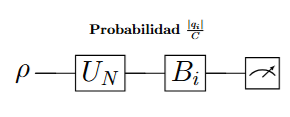

In [5]:

img = read("C:\\Users\\52331\\Downloads\\montecarlo.png")
IJulia.display("image/png", img)

Si lo generalizamos para el caso donde se aplican varias unitarias $U=U_n\circ...U_1$

$Tr(OU(\rho))= \sum_{i_n} p_{i_n} ... \sum_{i_1} p_{i_1} sgn(q_{i_n})\cdot\cdot\cdot sgn(q_{i_1}) Tr(OB_{i_n}\circ U_{N_n}...B_{i_1}\circ U_{N_1}(\rho))$

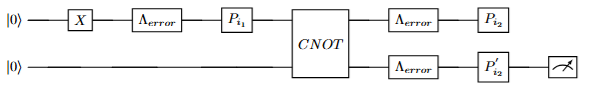

In [6]:
img = read("C:\\Users\\52331\\Downloads\\cnot.png")
IJulia.display("image/png", img)

In [6]:
function random_integer(px, py, pz, n_compuertas)

    coeficientes=quasi_probabilities(px, py, pz)
    C=sum(abs.(coeficientes))
    

    probabilidades= abs.(coeficientes)/C
    integer=[0, 1, 2, 3]

    dist= ProbabilityWeights(probabilidades)
    muestra= StatsBase.sample(integer, dist, n_compuertas)

    signo=1
    for j in 1:length(muestra)
    signo *= sign(coeficientes[muestra[j] + 1])
    end
    
    return muestra, signo
    

end


random_integer (generic function with 1 method)

In [7]:
function random_operation(state, n_qubit, muestra, n_compuerta)

    if muestra[n_compuerta] == 1
        
        apply_unitary!(state, X, 2^n_qubit)

    elseif muestra[n_compuerta] == 2
        
        apply_unitary!(state, Y, 2^n_qubit)
    elseif muestra[n_compuerta] == 3
       
        apply_unitary!(state, Z, 2^n_qubit)
    end

    
end

random_operation (generic function with 1 method)

In [8]:
function operation_one_qubit(state, operation, px, py, pz, n_qubit)

    apply_unitary!(state, operation, 2^n_qubit)
    apply_pauli_channel!(state, px, py, pz, 2^n_qubit)
    
end

operation_one_qubit (generic function with 1 method)

In [9]:
function operation_two_qubit(state, operation, px, py, pz, n_qubit1, n_qubit2)

    apply_unitary!(state, operation, 2^n_qubit1 + 2^n_qubit2)
    apply_pauli_channel!(state, px, py, pz, 2^n_qubit1)
    apply_pauli_channel!(state, px, py, pz, 2^n_qubit2)
    
end

operation_two_qubit (generic function with 1 method)

In [10]:
function circuito(n_qubits, px, py, pz)

    state= zeros(Complex{Float64}, 2^n_qubits)
    state[1]= 1.0

    rho= projector(state)

    n_compuertas = 7

    muestra, signo= random_integer(px, py, pz, n_compuertas)

    operation_one_qubit(rho, X, px, py, pz, 0)
    random_operation(rho, 0, muestra, 1)
    operation_two_qubit(rho, cnot, px, py, pz, 0, 1)
    random_operation(rho, 0, muestra, 2)
    random_operation(rho, 1, muestra, 3)
    operation_two_qubit(rho, cnot, px, py, pz, 0, 1)
    random_operation(rho, 0, muestra, 4)
    random_operation(rho, 1, muestra, 5)
    operation_two_qubit(rho, cnot, px, py, pz, 0, 1)
    random_operation(rho, 0, muestra, 6)
    random_operation(rho, 1, muestra, 7)
    
    rho_p= partial_trace(rho, 2^(n_qubits-1), Val(true))
    
    

    return rho_p, signo
    
end

circuito (generic function with 1 method)

Clásicamente, la medición de un observable se interpreta como una variable aleatoria cuyos posibles resultados son los valores propios de dicho observable, y las probabilidades de cada resultado dependen del estado cuántico sobre el cual se realiza la medición.

En el caso de un qubit, esta medición puede modelarse mediante una distribución de Bernoulli: la probabilidad de que el estado colapse al estado $\ket{1}$ viene dada por

$p=Tr(\ket{0}\bra{0}\rho)$

In [11]:

function medicion(rho)
    estado1=[0 0; 0 1]
    probabilidad=real(tr(estado1*rho))
    binomial=Bernoulli(probabilidad)
    resultado= -(rand(binomial)*2-1)
    return resultado
end

medicion (generic function with 1 method)


La variable aleatoría que describe la medición

$\hat{Z}_{em}= C^n\sum_{i_{n}}p_{i_n}...\sum_{i_{1}}p_{i_1} sgn(q_{i_n})\cdot\cdot\cdot sgn(q_{i_1}) \hat{O}^{(i_1, i_2,...,i_n)}$

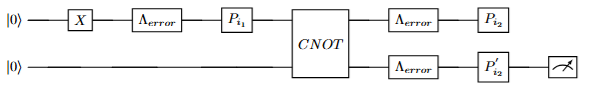

In [7]:
img = read("C:\\Users\\52331\\Downloads\\cnot.png")
IJulia.display("image/png", img)

In [12]:
function simulacion(n_qubits, px, py, pz, n_compuertas, n_shots)
    coeficientes=quasi_probabilities(px, py, pz)
    C=sum(abs.(coeficientes))
    resultados= zeros(n_shots)
    for i in 1:n_shots
        rho, signo= circuito(n_qubits, px, py, pz)
        resultados[i]= medicion(rho)*signo
        
    end
    return C^n_compuertas*sum(resultados)/n_shots    
end

simulacion (generic function with 1 method)

In [13]:
function valores_esperados(n_qubits, px, py, pz,n_compuertas, n_shots, n)
    valores=zeros(n)
    Threads.@threads for i in 1:n
        valores[i]= simulacion(n_qubits, px, py, pz, n_compuertas, n_shots)
    end
    return valores
end

valores_esperados (generic function with 1 method)

In [14]:
function circuito_ruido(n_qubits, px, py, pz)

    state= zeros(Complex{Float64}, 2^n_qubits)
    state[1]= 1.0

    rho= projector(state)

    operation_one_qubit(rho, X, px, py, pz, 0)
    operation_two_qubit(rho, cnot, px, py, pz, 0, 1)
    operation_two_qubit(rho, cnot, px, py, pz, 0, 1)
    operation_two_qubit(rho, cnot, px, py, pz, 0, 1)

    
    rho_p= partial_trace(rho, 2^(n_qubits-1), Val(true))
    return rho_p

    
end

circuito_ruido (generic function with 1 method)

In [15]:
rho_p= circuito_ruido(2, 0.05, 0.05, 0.1)

2×2 Matrix{ComplexF64}:
 0.33616+0.0im      0.0+0.0im
     0.0+0.0im  0.66384+0.0im

In [16]:
function simulacion_ruido(rho, n_shots)
    resultados=[]
    for i in 1:n_shots
        resultado= medicion(rho)
        push!(resultados, resultado)
    end
    return sum(resultados)/n_shots

    
end

simulacion_ruido (generic function with 1 method)

In [17]:
function valores_esperados_ruido(rho, n_shots, n)
    valores=[]
    for i in 1:n
        push!(valores, simulacion_ruido(rho, n_shots))
    end
    return valores
end

valores_esperados_ruido (generic function with 1 method)

In [18]:
px= 0.05
py= 0.05
pz= 0.1

0.1

In [19]:
exp_values_ruido =valores_esperados_ruido(rho_p, 500, 1000)

1000-element Vector{Any}:
 -0.256
 -0.272
 -0.372
 -0.28
 -0.36
 -0.36
 -0.308
 -0.336
 -0.28
 -0.396
  ⋮
 -0.308
 -0.272
 -0.356
 -0.324
 -0.324
 -0.388
 -0.264
 -0.388
 -0.312

In [20]:
exp_values = valores_esperados(2, px, py, pz, 7, 6000, 1000)

1000-element Vector{Float64}:
 -0.8591704504540991
 -1.0047925607005566
 -1.4198155749029604
 -1.3397234142674088
 -0.7717971843062246
 -0.8300460284048077
 -0.7281105512322874
 -0.9611059276266193
 -1.1941013040209514
 -0.8955759780157135
  ⋮
 -0.7863593953308703
 -1.150414670947014
 -0.9319815055773278
 -1.5508754741247721
 -0.9611059276266193
 -0.5242395968872469
 -0.990230349675911
 -1.1941013040209514
 -1.5945621071987095

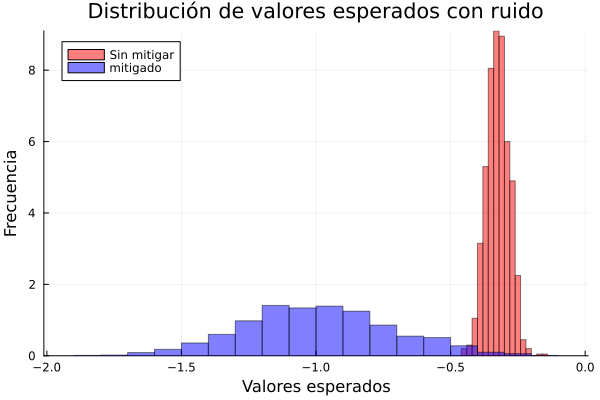

In [21]:
using Plots
histogram(exp_values_ruido, bins=20,normalize=:pdf, label="Sin mitigar", alpha=0.5, color=:red, title="Distribución de valores esperados con ruido", xlabel="Valores esperados", ylabel="Frecuencia")
histogram!(exp_values, bins=20, normalize=:pdf, label="mitigado", alpha=0.5, color=:blue)

In [22]:
mean(exp_values)

-0.9919632527878436

In [23]:
mean(exp_values_ruido)

-0.32627199999999995

In [24]:
var(exp_values)

0.07719469931956142

In [25]:
var(exp_values_ruido)

0.0017795295455455503

## Errores y cambios

In [ ]:
function Pauli_channel_two_qubit(px, py, pz, rho)
    new_rho= zeros(size(rho))

    coeficientes= [1-(px + py + pz), px, py, pz]
    for i in 1:4
        for j in 1:4
            new_rho += coeficientes[i]*coeficientes[j]*kron(sigmas[i-1], sigmas[j-1])*rho*kron(sigmas[i-1], sigmas[j-1]) 
        end
    end

   
    return new_rho    
end

In [ ]:
function operation_two_qubit(state, operation, px, py, pz, n_qubit1, n_qubit2)

    apply_unitary!(state, operation, 2^n_qubit1 + 2^n_qubit2)
    apply_pauli_channel!(state, Pauli_channel_two_qubit, px, py, pz, 2^n_qubit1 + 2^n_qubit2)
    
end

In [ ]:
function operation_one_qubit(state, operation, px, py, pz, n_qubit, muestra, n_compuerta)

    apply_unitary!(state, operation, 2^n_qubit)
    apply_pauli_channel!(state,Pauli_channel, px, py, pz, 2^n_qubit)

        
    if muestra[n_compuerta] == 1
        
        apply_unitary!(state, X, 2^n_qubit)

    elseif muestra[n_compuerta] == 2
        
        apply_unitary!(state, Y, 2^n_qubit)
    elseif muestra[n_compuerta] == 3
       
        apply_unitary!(state, Z, 2^n_qubit)
    end
    
end

In [ ]:
function operation_two_qubit(state, operation, px , py, pz, n_qubit1, n_qubit2, muestra, ns_compuertas)

    apply_unitary!(state, operation, 2^n_qubit1 + 2^n_qubit2)
    apply_pauli_channel!(state, Pauli_channel_two_qubit, px, py, pz, 2^n_qubit1 + 2^n_qubit2)

    
        
    if muestra[ns_compuertas] == [0, 1]
        
        apply_unitary!(state, X, 2^n_qubit2)
    elseif muestra[ns_compuertas] == [0, 2]
        
        apply_unitary!(state, Y, 2^n_qubit2)
    elseif muestra[ns_compuertas] == [0, 3]
        
        apply_unitary!(state, Z, 2^n_qubit2)
    elseif muestra[ns_compuertas] == [1, 0]
        
        apply_unitary!(state, X, 2^n_qubit1)
    elseif muestra[ns_compuertas] == [1, 1]
        
        apply_unitary!(state, X, 2^n_qubit1)
        apply_unitary!(state, X, 2^n_qubit2)
    elseif muestra[ns_compuertas] == [1, 2]
       
        apply_unitary!(state, X, 2^n_qubit1)
        apply_unitary!(state, Y, 2^n_qubit2)
    elseif muestra[ns_compuertas] == [1, 3]
        
        apply_unitary!(state, X, 2^n_qubit1)
        apply_unitary!(state, Z, 2^n_qubit2)
    elseif muestra[ns_compuertas] == [2, 0]
        
        apply_unitary!(state, Y, 2^n_qubit1)
    elseif muestra[ns_compuertas] == [2, 1]
        
        apply_unitary!(state, Y, 2^n_qubit1)
        apply_unitary!(state, X, 2^n_qubit2)
    elseif muestra[ns_compuertas] == [2, 2]
        
        apply_unitary!(state, Y, 2^n_qubit1)
        apply_unitary!(state, Y, 2^n_qubit2)
    elseif muestra[ns_compuertas] == [2, 3]
        
        apply_unitary!(state, Y, 2^n_qubit1)
        apply_unitary!(state, Z, 2^n_qubit2)
    elseif muestra[ns_compuertas] == [3, 0]
        
        apply_unitary!(state, Z, 2^n_qubit1)
    elseif muestra[ns_compuertas] == [3, 1]
        
        apply_unitary!(state, Z, 2^n_qubit1)
        apply_unitary!(state, X, 2^n_qubit2)
    elseif muestra[ns_compuertas] == [3, 2]
        
        apply_unitary!(state, Z, 2^n_qubit1)
        apply_unitary!(state, Y, 2^n_qubit2)
    elseif muestra[ns_compuertas] == [3, 3]
        
        apply_unitary!(state, Z, 2^n_qubit1)
        apply_unitary!(state, Z, 2^n_qubit2)
    end
    
    
end

## Comentarios finales

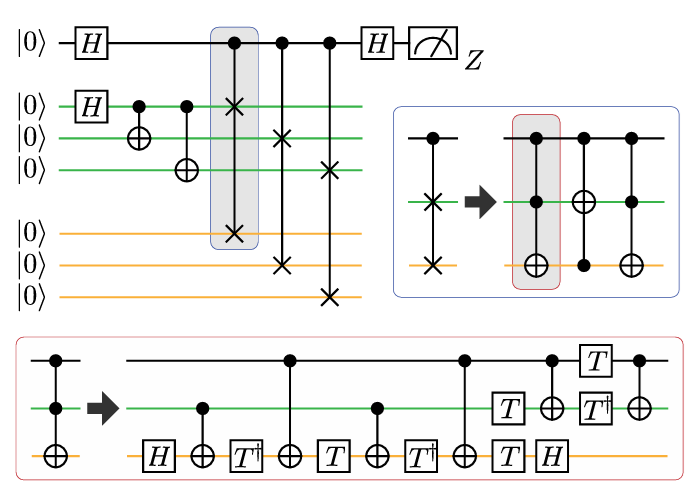

In [26]:

img = read("C:\\Users\\52331\\Downloads\\swap_test.png")
IJulia.display("image/png", img)